In [1]:
import backtrader as bt
import yfinance as yf

In [2]:
tsla_daily = yf.download('TSLA',start='2020-01-01')
tsla_hourly = yf.download('TSLA',start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
tsla_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 973 entries, 2020-01-02 to 2023-11-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       973 non-null    float64
 1   High       973 non-null    float64
 2   Low        973 non-null    float64
 3   Close      973 non-null    float64
 4   Adj Close  973 non-null    float64
 5   Volume     973 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 53.2 KB


In [4]:
tsla_daily_parsed = bt.feeds.PandasData(dataname = tsla_daily,
                                        datetime= None,
                                        open=0,
                                        high=1,
                                        low=2,
                                        close=3,
                                        volume=4,
                                        openinterest=None)

tsla_hourly_parsed = bt.feeds.PandasData(dataname = tsla_hourly,
                                        datetime= None,
                                        open=0,
                                        high=1,
                                        low=2,
                                        close=3,
                                        volume=4,
                                        openinterest=None,
                                        timeframe=bt.TimeFrame.Minutes)



### add data

In [ ]:
# Daily data 
cerebro = bt.Cerebro()
cerebro.adddata(tsla_daily_parsed)
cerebro.run()

cerebro.plot(iplot=False)

In [ ]:
# Hourly data
cerebro = bt.Cerebro()
cerebro.adddata(tsla_hourly_parsed)
cerebro.run()

cerebro.plot(iplot=False)

# Resample Data

In [ ]:
cerebro = bt.Cerebro()

# Hourly -> 5 Days
cerebro.resampledata(dataname = tsla_hourly_parsed, timeframe = bt.TimeFrame.Days,compression=7)
cerebro.run()

cerebro.plot(iplot=False)



In [6]:
cerebro = bt.Cerebro()

# 1 Day -> 5 Days (More noise in shorter timeframe)
cerebro.resampledata(dataname = tsla_hourly_parsed, timeframe = bt.TimeFrame.Days,compression=5)
cerebro.adddata(tsla_daily_parsed)

cerebro.run()

cerebro.plot(iplot=False)

[[<Figure size 800x600 with 6 Axes>]]

# BackTrader Strategy

## Conceptual Strategy Loop
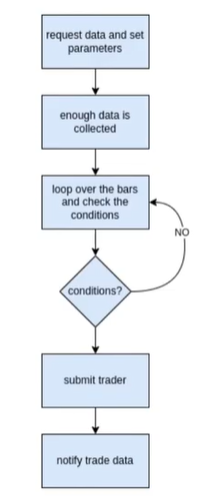




## Backtrader Strategy Methods
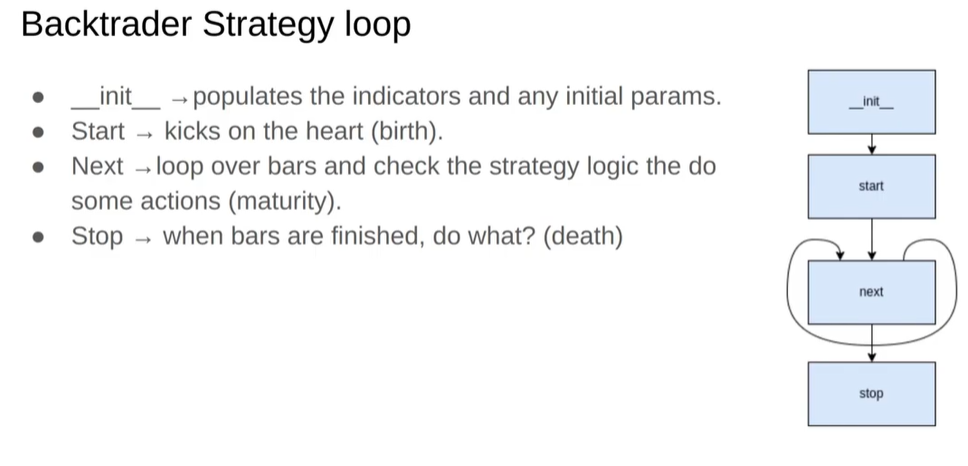


## Loading Multiple Data
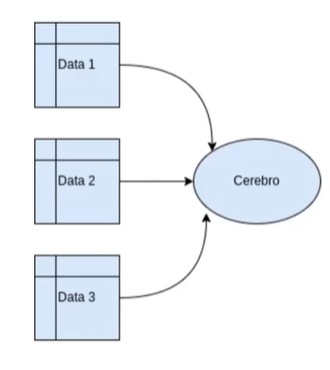

In [5]:
import backtrader as bt
import pandas as pd
import yfinance as yf

tsla = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [36]:
# Checking Data
tsla.info()
tsla.head(2)
tsla.tail(2)

# Load data
data = bt.feeds.PandasData(dataname = tsla)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3367 entries, 2010-06-29 to 2023-11-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3367 non-null   float64
 1   High       3367 non-null   float64
 2   Low        3367 non-null   float64
 3   Close      3367 non-null   float64
 4   Adj Close  3367 non-null   float64
 5   Volume     3367 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 184.1 KB


In [37]:
# testStrategy with nothing  
class testStrategy(bt.Strategy):
    def __init__(self):
        pass
    
    def next(self): 
        pass
    

#  Get closing prices   
class testClose(bt.Strategy):
    def __init__(self):
        pass
    
    def next(self):
        dataclose = self.datas[0].close[0]
        print(dataclose)
        

# Get closing prices        
class testClosei(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
    
    def next(self):
        print(self.dataclose[0])
        

# Get Datetime and closing price
class testlog(bt.Strategy):
    def __init__(self):
        self.dataclose =self.datas[0].close
        

    def log(self,txt):
        dt = self.datas[0].datetime.datetime() # Get date of candle
        print(f'{dt} | {txt}')
    
    def next(self):
        x = self.dataclose[0]
        self.log(txt=x)

In [38]:
def load_strategy(strategy,data):
    cerebro = bt.Cerebro()
    cerebro.adddata(data)
    cerebro.addstrategy(strategy)
    cerebro.run()
    cerebro.plot(iplot=False)

load_strategy(testlog,data)

2010-06-29 00:00:00 | 1.5926669836044312
2010-06-30 00:00:00 | 1.5886670351028442
2010-07-01 00:00:00 | 1.4639999866485596
2010-07-02 00:00:00 | 1.2799999713897705
2010-07-06 00:00:00 | 1.0740000009536743
2010-07-07 00:00:00 | 1.053333044052124
2010-07-08 00:00:00 | 1.1640000343322754
2010-07-09 00:00:00 | 1.159999966621399
2010-07-12 00:00:00 | 1.136667013168335
2010-07-13 00:00:00 | 1.2093329429626465
2010-07-14 00:00:00 | 1.3226670026779175
2010-07-15 00:00:00 | 1.3259999752044678
2010-07-16 00:00:00 | 1.3760000467300415
2010-07-19 00:00:00 | 1.4606670141220093
2010-07-20 00:00:00 | 1.3533329963684082
2010-07-21 00:00:00 | 1.3480000495910645
2010-07-22 00:00:00 | 1.399999976158142
2010-07-23 00:00:00 | 1.4193329811096191
2010-07-26 00:00:00 | 1.3966670036315918
2010-07-27 00:00:00 | 1.3700000047683716
2010-07-28 00:00:00 | 1.3813329935073853
2010-07-29 00:00:00 | 1.3566670417785645
2010-07-30 00:00:00 | 1.329332947731018
2010-08-02 00:00:00 | 1.3946670293807983
2010-08-03 00:00:00 |

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
import backtrader as bt
import datetime

C:\Users\me\AppData\Local\Temp\ipykernel_2448\1975760830.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [15]:
# Momentum Strategy 
class Momentum(bt.Strategy): 
    def __init__(self):
        self.dataclose = self.datas[0].close
        
    def next(self):
        dt = self.datas[0].datetime.datetime() # Get date of candle
        
        if self.dataclose[-2] > self.dataclose[-1]:
            self.order = self.buy() # Market order
            print(f'{dt} buy executed {self.dataclose[0]}')
        if self.dataclose[-2] < self.dataclose[-1]:
            self.order = self.sell() # Market order
            print(f'{dt} sell executed {self.dataclose[0]}')
        else:
            self.order = self.close()
            print(f'{dt} close executed {self.dataclose[0]}')   

In [16]:
load_strategy(Momentum)

2010-06-29 00:00:00 sell executed 1.5926669836044312
2010-06-30 00:00:00 buy executed 1.5886670351028442
2010-06-30 00:00:00 close executed 1.5886670351028442
2010-07-01 00:00:00 buy executed 1.4639999866485596
2010-07-01 00:00:00 close executed 1.4639999866485596
2010-07-02 00:00:00 buy executed 1.2799999713897705
2010-07-02 00:00:00 close executed 1.2799999713897705
2010-07-06 00:00:00 buy executed 1.0740000009536743
2010-07-06 00:00:00 close executed 1.0740000009536743
2010-07-07 00:00:00 buy executed 1.053333044052124
2010-07-07 00:00:00 close executed 1.053333044052124
2010-07-08 00:00:00 buy executed 1.1640000343322754
2010-07-08 00:00:00 close executed 1.1640000343322754
2010-07-09 00:00:00 sell executed 1.159999966621399
2010-07-12 00:00:00 buy executed 1.136667013168335
2010-07-12 00:00:00 close executed 1.136667013168335
2010-07-13 00:00:00 buy executed 1.2093329429626465
2010-07-13 00:00:00 close executed 1.2093329429626465
2010-07-14 00:00:00 sell executed 1.322667002677917

2012-12-26 00:00:00 sell executed 2.239332914352417
2012-12-27 00:00:00 buy executed 2.246000051498413
2012-12-27 00:00:00 close executed 2.246000051498413
2012-12-28 00:00:00 sell executed 2.2146670818328857
2012-12-31 00:00:00 buy executed 2.257999897003174
2012-12-31 00:00:00 close executed 2.257999897003174
2013-01-02 00:00:00 sell executed 2.357332944869995
2013-01-03 00:00:00 sell executed 2.318000078201294
2013-01-04 00:00:00 buy executed 2.293333053588867
2013-01-04 00:00:00 close executed 2.293333053588867
2013-01-07 00:00:00 buy executed 2.2893331050872803
2013-01-07 00:00:00 close executed 2.2893331050872803
2013-01-08 00:00:00 buy executed 2.245332956314087
2013-01-08 00:00:00 close executed 2.245332956314087
2013-01-09 00:00:00 buy executed 2.2426669597625732
2013-01-09 00:00:00 close executed 2.2426669597625732
2013-01-10 00:00:00 buy executed 2.23533296585083
2013-01-10 00:00:00 close executed 2.23533296585083
2013-01-11 00:00:00 buy executed 2.194000005722046
2013-01-11

2015-08-13 00:00:00 sell executed 16.167333602905273
2015-08-14 00:00:00 sell executed 16.209999084472656
2015-08-17 00:00:00 sell executed 16.999332427978516
2015-08-18 00:00:00 sell executed 17.381332397460938
2015-08-19 00:00:00 sell executed 17.016666412353516
2015-08-20 00:00:00 buy executed 16.14533233642578
2015-08-20 00:00:00 close executed 16.14533233642578
2015-08-21 00:00:00 buy executed 15.38466739654541
2015-08-21 00:00:00 close executed 15.38466739654541
2015-08-24 00:00:00 buy executed 14.591333389282227
2015-08-24 00:00:00 close executed 14.591333389282227
2015-08-25 00:00:00 buy executed 14.66866683959961
2015-08-25 00:00:00 close executed 14.66866683959961
2015-08-26 00:00:00 sell executed 14.989333152770996
2015-08-27 00:00:00 sell executed 16.19933319091797
2015-08-28 00:00:00 sell executed 16.565332412719727
2015-08-31 00:00:00 sell executed 16.604000091552734
2015-09-01 00:00:00 sell executed 15.908666610717773
2015-09-02 00:00:00 buy executed 16.512666702270508
2

2016-04-28 00:00:00 buy executed 16.513999938964844
2016-04-28 00:00:00 close executed 16.513999938964844
2016-04-29 00:00:00 buy executed 16.05066680908203
2016-04-29 00:00:00 close executed 16.05066680908203
2016-05-02 00:00:00 buy executed 16.1200008392334
2016-05-02 00:00:00 close executed 16.1200008392334
2016-05-03 00:00:00 sell executed 15.48799991607666
2016-05-04 00:00:00 buy executed 14.837332725524902
2016-05-04 00:00:00 close executed 14.837332725524902
2016-05-05 00:00:00 buy executed 14.10200023651123
2016-05-05 00:00:00 close executed 14.10200023651123
2016-05-06 00:00:00 buy executed 14.328666687011719
2016-05-06 00:00:00 close executed 14.328666687011719
2016-05-09 00:00:00 sell executed 13.928000450134277
2016-05-10 00:00:00 buy executed 13.912667274475098
2016-05-10 00:00:00 close executed 13.912667274475098
2016-05-11 00:00:00 buy executed 13.93066692352295
2016-05-11 00:00:00 close executed 13.93066692352295
2016-05-12 00:00:00 sell executed 13.8186674118042
2016-0

2019-03-20 00:00:00 buy executed 18.239999771118164
2019-03-20 00:00:00 close executed 18.239999771118164
2019-03-21 00:00:00 sell executed 18.26799964904785
2019-03-22 00:00:00 sell executed 17.635332107543945
2019-03-25 00:00:00 buy executed 17.3613338470459
2019-03-25 00:00:00 close executed 17.3613338470459
2019-03-26 00:00:00 buy executed 17.851333618164062
2019-03-26 00:00:00 close executed 17.851333618164062
2019-03-27 00:00:00 sell executed 18.32200050354004
2019-03-28 00:00:00 sell executed 18.57466697692871
2019-03-29 00:00:00 sell executed 18.657333374023438
2019-04-01 00:00:00 sell executed 19.278667449951172
2019-04-02 00:00:00 sell executed 19.058666229248047
2019-04-03 00:00:00 buy executed 19.45400047302246
2019-04-03 00:00:00 close executed 19.45400047302246
2019-04-04 00:00:00 sell executed 17.851999282836914
2019-04-05 00:00:00 buy executed 18.33066749572754
2019-04-05 00:00:00 close executed 18.33066749572754
2019-04-08 00:00:00 sell executed 18.213333129882812
2019

2021-01-26 00:00:00 sell executed 294.36334228515625
2021-01-27 00:00:00 sell executed 288.0533447265625
2021-01-28 00:00:00 buy executed 278.4766540527344
2021-01-28 00:00:00 close executed 278.4766540527344
2021-01-29 00:00:00 buy executed 264.510009765625
2021-01-29 00:00:00 close executed 264.510009765625
2021-02-01 00:00:00 buy executed 279.9366760253906
2021-02-01 00:00:00 close executed 279.9366760253906
2021-02-02 00:00:00 sell executed 290.92999267578125
2021-02-03 00:00:00 sell executed 284.89666748046875
2021-02-04 00:00:00 buy executed 283.3299865722656
2021-02-04 00:00:00 close executed 283.3299865722656
2021-02-05 00:00:00 buy executed 284.07666015625
2021-02-05 00:00:00 close executed 284.07666015625
2021-02-08 00:00:00 sell executed 287.8066711425781
2021-02-09 00:00:00 sell executed 283.1533203125
2021-02-10 00:00:00 buy executed 268.2733459472656
2021-02-10 00:00:00 close executed 268.2733459472656
2021-02-11 00:00:00 buy executed 270.5533447265625
2021-02-11 00:00:00

2023-01-25 00:00:00 sell executed 144.42999267578125
2023-01-26 00:00:00 sell executed 160.27000427246094
2023-01-27 00:00:00 sell executed 177.89999389648438
2023-01-30 00:00:00 sell executed 166.66000366210938
2023-01-31 00:00:00 buy executed 173.22000122070312
2023-01-31 00:00:00 close executed 173.22000122070312
2023-02-01 00:00:00 sell executed 181.41000366210938
2023-02-02 00:00:00 sell executed 188.27000427246094
2023-02-03 00:00:00 sell executed 189.97999572753906
2023-02-06 00:00:00 sell executed 194.75999450683594
2023-02-07 00:00:00 sell executed 196.80999755859375
2023-02-08 00:00:00 sell executed 201.2899932861328
2023-02-09 00:00:00 sell executed 207.32000732421875
2023-02-10 00:00:00 sell executed 196.88999938964844
2023-02-13 00:00:00 buy executed 194.63999938964844
2023-02-13 00:00:00 close executed 194.63999938964844
2023-02-14 00:00:00 buy executed 209.25
2023-02-14 00:00:00 close executed 209.25
2023-02-15 00:00:00 sell executed 214.24000549316406
2023-02-16 00:00:0

In [ ]:
df = pd.read_csv('eur_hourly.csv', parse_dates=True, index_col = 'Timestamp')
df['return'] = np.log(df.price/df.price.shift(1)) # Get price change
df['return'].groupby(df.index.hour).mean().plot(kind='bar')

# HourlyBias Strategy
class HourlyBias(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
    
    def next(self):
        if self.datas[0].datetime.datetime().hour == 9:
            self.order = self.sell()
            print(f'selling at {self.dataclose[0]}')
            
        if self.datas[0].datetime.datetime().hour == 12:
            self.order = self.buy()
            print(f'Buying at {self.dataclose[0]}')


#  Since we don't have OHLVC (0 ,-1 = Nothing)
data = bt.feeds.PandasData(dataname = df,
                           open = 0,
                          high = 0,
                          close = 0,
                           volume= -1,
                           openinterest=-1
                          )
        
cerebro = bt.Cerebro()
cerebro.adddata(data)

cerebro.addstrategy(HourlyBias)
cerebro.run()

In [ ]:

# Fear and Greed Index Strategy
class FearGreed(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close
    
    def next(self):
        if self.datas[1].datetime.datetime().hour == 9:
            self.order = self.sell()
            print(f'selling at {self.dataclose[0]}')
            
        if self.datas[0].datetime.datetime().hour == 12:
            self.order = self.buy()
            print(f'Buying at {self.dataclose[0]}')


#  Since we don't have OHLVC (0 ,-1 = Nothing)
data = bt.feeds.PandasData(dataname = df,
                           open = 0,
                          high = 0,
                          close = 0,
                           volume= -1,
                           openinterest=-1
                          )
        
cerebro = bt.Cerebro()
cerebro.adddata(data)

cerebro.addstrategy(HourlyBias)
cerebro.run()

# Backtrader Indicators

__init__ : Instantiate line object (data series of indicator values over time) </br>
__next__ : Call current value 

In [39]:
#  Add  RSI and SMA
class Test(bt.Strategy):
    def __init__(self):
        self.sma = bt.indicators.SMA(self.datas[0].close,period = 7)
        self.sma = bt.indicators.SMA(self.datas[0].close,period = 30)
        self.sma = bt.indicators.SMA(self.datas[0].close,period = 365)

        self.rsi = bt.indicators.RSI(self.datas[0].close,period = 200)
     
    def next(self):
        print(f'current price : {self.datas[0].close[0]} | SMA : {self.sma[0]} | RSI : {self.rsi[0]}')


fromdate = datetime.datetime.strptime('2020-07-01','%Y-%m-%d')
todate = datetime.datetime.strptime('2020-07-12','%Y-%m-%d')

data = bt.feeds.GenericCSVData(dataname='BTC_data.csv', dtformat=2, compression=15, timeframe = bt.TimeFrame.Minutes, fromdate= fromdate, todate=todate)

load_strategy(Test,data)

OSError: [Errno 22] Invalid argument